# 6.2 Cary Exploring Relationships

## Contents:

01. Install Libraries
02. Import Libraries
03. Import Datasets
04. Exploring Relationships
    - Explores correlation matrices, heat maps, scatterplots, pair plots, and categorical plots
05. Final Exercise Notes


# 01. Install Libraries 

In [3]:
pip install --upgrade seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


# 02. Import Libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [12]:
print(matplotlib.__version__)
print(sns.__version__)

3.10.0
0.13.2


# 03. Import Datasets

In [15]:
# Defines path as intro file path for Cary Real Estate project

path = r'/home/0668a905-109d-4403-be59-0a04abf51dd9/Cary Real Estate Analysis'

In [18]:
# Imports cary_cleaned dataset

df = pd.read_parquet(os.path.join(path, '01 Datasets', '02 Prepared Data', 'cary_cleaned.parquet'))

In [20]:
# Set the display option to show all columns

pd.set_option('display.max_columns', None)

# 04. Exploring Relationships

In [24]:
# Check columns

df.head(5)

,owneradd1,owneradd2,owneradd3,location,calcacreage,deedacres,streetnumber,streetmisc,streetprefix,streetname,streettype,streetsuffix,landclass,totalstructures,totalunits,propertydesc,bldgvalue,landvalue,landsalevalue,landsaledate,totalsalevalue,totalsaledate,cary_city,apaownership,apaactivity,apafunction,apastructure,apasite,billingclass,apaownershipdesc,apaactivitydesc,apafunctiondesc,apastructuredesc,apasitedesc,county,totalbldgsqft,typedecode,phycity,phyzip,utilities,shape_starea,shape_stlength,yearbuilt,chathamaddress,geo_shape,geo_point_2d,latitude,longitude
0,38 Saint Paul Ave,None,None,613 Hanson Rd,0.15,0.15,613,None,None,Hanson,RD,None,Res 1 Family,NaN,NaN,BAY POINTE/PH:03/LT#099 PL000161-000365,195234,40180,40180,None,235414,2017-10-27,None,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,Durham,2080,None,Durham,27713,None,6451.097435,336.681551,NaT,None,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,b'\x01\x01\x00\x00\x00;\x87\xfc\xe6~\xbaS\xc09...,35.941222,-78.913996
1,2908 London Bell Dr,None,None,619 Hanson Rd,0.16,0.16,619,None,None,Hanson,RD,None,Res 1 Family,NaN,NaN,BAY POINTE/PH:03/LT#096 PL000161-000365,179487,40705,40705,None,220192,2023-12-05,None,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,Durham,1906,None,Durham,27713,None,7096.203754,354.824260,NaT,None,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,b'\x01\x01\x00\x00\x00\xa3U\xce\xfat\xbaS\xc0\...,35.941139,-78.913390
2,1411 Carrickfergus Ct,None,None,1411 Carrickfergus Ct,0.22,0.22,1411,None,None,Carrickfergus,CT,None,Res 1 Family,NaN,NaN,OAKHAVEN/LT#15 PL000161-000075,275711,75937,75937,None,351648,NaT,None,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,Durham,3200,None,Durham,27713,None,9361.373133,405.469398,NaT,None,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x1d\x00...,b'\x01\x01\x00\x00\x00\xdf\\\xfe\x8d\xc3\xbbS\...,35.890914,-78.933811
3,4532 Shady Side Ln,None,None,4532 Shady Side Ln,0.13,0.13,4532,None,None,Shady Side,LN,None,Res 1 Family,NaN,NaN,BAY POINTE/PH:03/LT#069 PL000161-000365,203620,39480,39480,None,243100,NaT,None,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,Durham,2308,None,Durham,27713,None,5588.978748,310.423891,NaT,None,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,b'\x01\x01\x00\x00\x00\x036\xbd\x00q\xbaS\xc0\...,35.940075,-78.913147
4,3608 Rambir Dr,None,None,3608 Ranbir Dr,0.28,0.28,3608,None,None,Ranbir,DR,None,Res 1 Family,NaN,NaN,LOCHSIDE/PH:01/LT#105 PL000165-000308,163464,57600,57600,None,221064,2013-06-27,None,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,Durham,1567,None,Durham,27713,None,12205.491128,453.505217,NaT,None,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,b'\x01\x01\x00\x00\x00d\xc3\x03\x0f}\xb9S\xc0\...,35.928977,-78.898258


## Correlations

### Create Correlation Heat Map using Seaborn

In [27]:
# Create a subset of columns to perform correlation matrix on

corr_cols = df[['bldgvalue', 'landvalue', 'landsalevalue', 'totalsalevalue', 'totalbldgsqft', 'yearbuilt', 'latitude', 'longitude']]

In [30]:
# Check datatypes

corr_cols.dtypes

bldgvalue                  Int64
landvalue                  Int64
landsalevalue              Int64
totalsalevalue             Int64
totalbldgsqft              Int64
yearbuilt         datetime64[ns]
latitude                 float64
longitude                float64
dtype: object

In [49]:
# Check null values

corr_cols.isna().sum()

bldgvalue           2301
landvalue           2301
landsalevalue      15747
totalsalevalue      2374
totalbldgsqft      51761
yearbuilt         101627
latitude               0
longitude              0
dtype: int64

In [33]:
# Apply the corr() method to the selected columns

corr_matrix = corr_cols.corr()

In [36]:
# Print corr_matrix

corr_matrix

,bldgvalue,landvalue,landsalevalue,totalsalevalue,totalbldgsqft,yearbuilt,latitude,longitude
bldgvalue,1.000000,0.182016,0.085604,0.173049,0.877976,0.049859,0.003796,0.016643
landvalue,0.182016,1.000000,0.274469,0.898771,0.559340,-0.007521,-0.002101,-0.009157
landsalevalue,0.085604,0.274469,1.000000,0.123615,0.208280,-0.025680,0.012816,-0.017310
totalsalevalue,0.173049,0.898771,0.123615,1.000000,0.394787,-0.006459,0.007994,-0.024732
totalbldgsqft,0.877976,0.559340,0.208280,0.394787,1.000000,0.034715,-0.002093,0.030438
yearbuilt,0.049859,-0.007521,-0.025680,-0.006459,0.034715,1.000000,-0.487760,0.457439
latitude,0.003796,-0.002101,0.012816,0.007994,-0.002093,-0.487760,1.000000,-0.252359
longitude,0.016643,-0.009157,-0.017310,-0.024732,0.030438,0.457439,-0.252359,1.000000


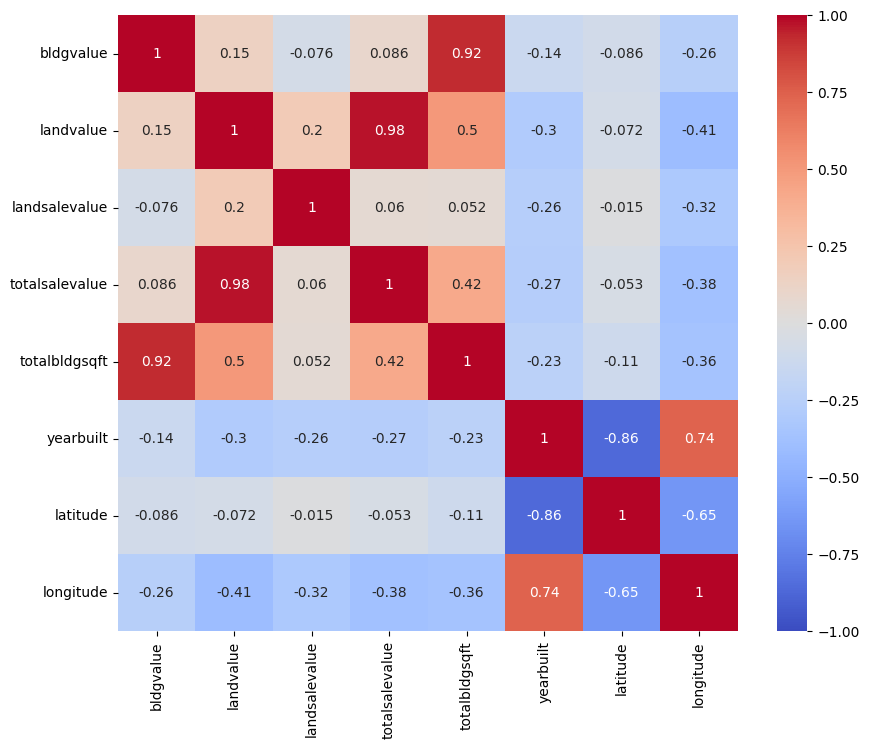

In [39]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(corr_matrix.corr(), annot = True,  cmap='coolwarm', vmin=-1, vmax=1, center=0,ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### Notes on Correlation Heat Map:

1. The yearbuilt column has a large number of missing variables (101,627 which is almost a third of all the rows). While the .corr() function should ignore NaN and NaT values, it could be that this would not be a good variable to make correlations against due to large amount of missing data.

2. Building value, Total building square footage, Land value, and Total Sale Value's correlations make a bit more sense in that they are more positive. Likewise, a slight negative correlation between Land Sale Value and Building Value would stand to reason--you wouldn't expect a direct, positive correlation between the two.

3. Seeing scatterplots of these variables together will better help illustrate the types of relationships.

## Scatterplots

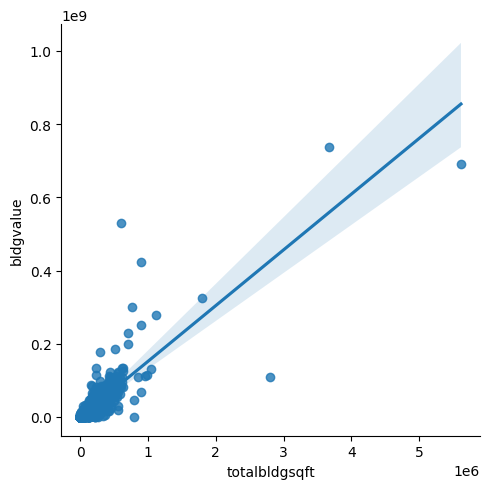

In [84]:
# Create a scatterplot for the 'totalbldgsqft' and 'bldgvalue' columns in seaborn

sns.lmplot(x = 'totalbldgsqft', y = 'bldgvalue', data = corr_cols)

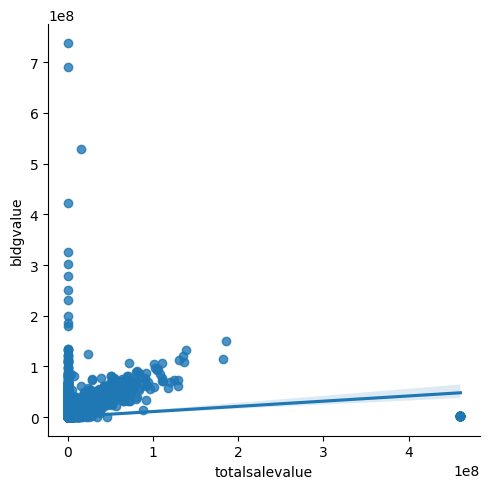

In [87]:
# Create a scatterplot for the 'totalsalevalue' and 'bldgvalue' columns in seaborn

sns.lmplot(x = 'totalsalevalue', y = 'bldgvalue', data = corr_cols)

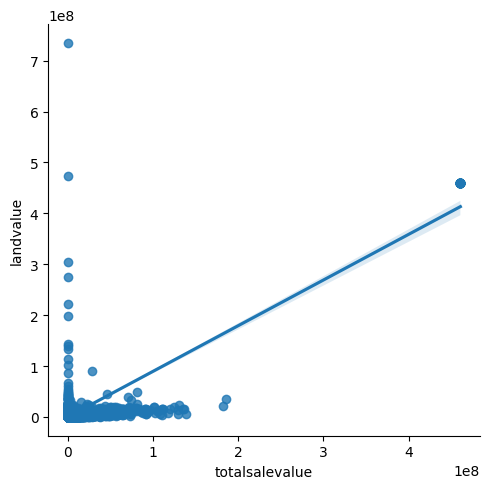

In [90]:
# Create a scatterplot for the 'totalsalevalue' and 'landvalue' columns in seaborn

sns.lmplot(x = 'totalsalevalue', y = 'landvalue', data = corr_cols)

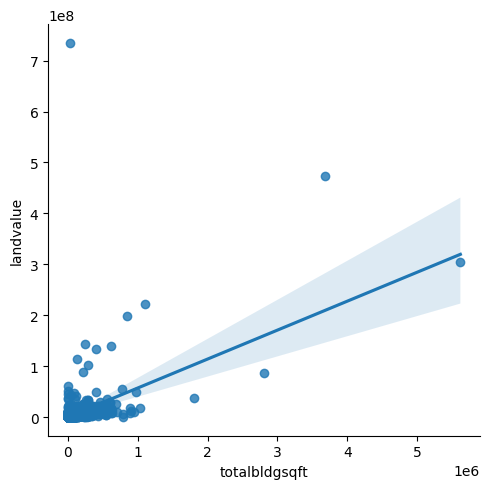

In [93]:
# Create a scatterplot for the 'totalbldgsqft' and 'landvalue' columns in seaborn

sns.lmplot(x = 'totalbldgsqft', y = 'landvalue', data = corr_cols)

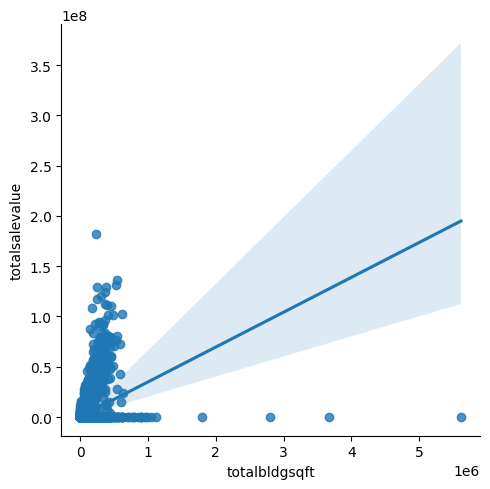

In [96]:
# Create a scatterplot for the 'totalbldgsqft' and 'totalsalevalue' columns in seaborn

sns.lmplot(x = 'totalbldgsqft', y = 'totalsalevalue', data = corr_cols)

#### Scatterplot Notes:

1. Clearly most of these relationships are non-linear

2. The only relationship that kind of makes sense is the building value to building square footage, though we see only a few outliers creating this correlation.

3. Something to note is that not all of these properties are individual homes, but can also be businesses or public properties--something worth grouping and analyzing individually in the future.

## Pair Plots

In [42]:
# Create a sub data frame for the variables to view in the pair plot

pair_cols = corr_cols[['totalbldgsqft', 'bldgvalue']]

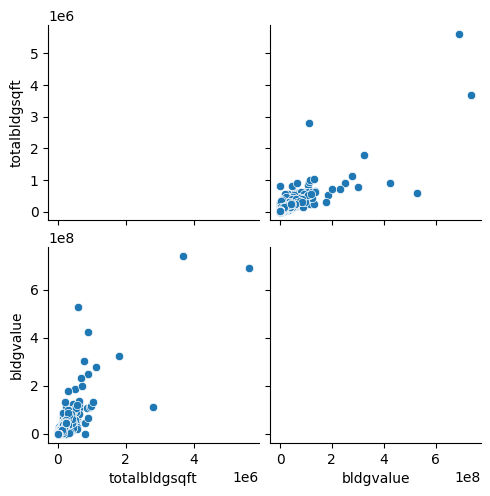

In [45]:
# Create a pair plot with logarithmic scale
pp = sns.pairplot(pair_cols)

#### Pair Plot Notes:

1. More than two column variables crashed the kernel, so can only compare variables at once for now

2. Outliers need to be removed in order to see the histogram plots within the pair plot (as discovered in below histograms)

3. Would like explore totalsalevalue and totalbldgsqft further but with outliers removed and broken down by property type

## Categorical Plots

<Axes: xlabel='totalsalevalue', ylabel='Count'>

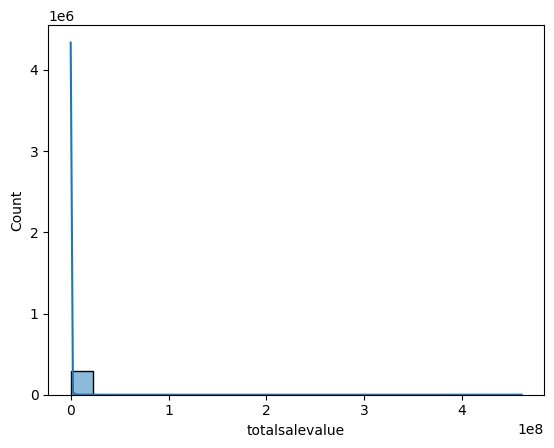

In [108]:
# Create histogram
sns.histplot(corr_cols['totalsalevalue'], bins=20, kde=True)

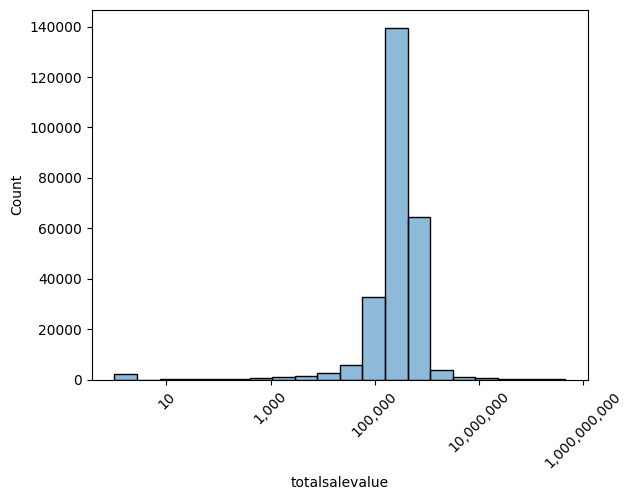

In [121]:
# Applying logarithmic scale to 'totalsalevalue' to compress range of values to better see data pattern

# Create the histogram with logarithmic scale
ax = sns.histplot(corr_cols['totalsalevalue'], bins=20, kde=True, log_scale=True)

# Remove scientific notation from x-axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

<Axes: xlabel='totalsalevalue', ylabel='Count'>

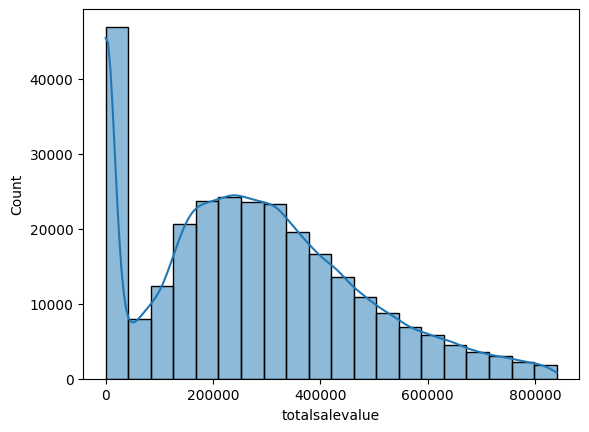

In [59]:
# Try a second method by removing outliers before plotting

Q1 = corr_cols['totalsalevalue'].quantile(0.25)
Q3 = corr_cols['totalsalevalue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_data = corr_cols[(corr_cols['totalsalevalue'] >= lower_bound) & (corr_cols['totalsalevalue'] <= upper_bound)]
sns.histplot(filtered_data['totalsalevalue'], bins=20, kde=True)

In [166]:
# Check min and max values of the data with removed outliers

min_value = filtered_data['totalsalevalue'].min()
max_value = filtered_data['totalsalevalue'].max()

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

Minimum value: 0
Maximum value: 840354


In [174]:
# Check min / max values of the date before removing outliers

min_value_2 = df['totalsalevalue'].min()
max_value_2 = df['totalsalevalue'].max()

print(f"Minimum value: {min_value_2}")
print(f"Maximum value: {max_value_2}")

Minimum value: 0
Maximum value: 460798013


### Create "Price Category" Column with Price flags "Low, Middle, and High"

In [153]:
corr_cols.loc[corr_cols['totalsalevalue'] < 200000, 'Price category'] = 'Low price'

In [156]:
corr_cols.loc[(corr_cols['totalsalevalue'] >= 200000) & (corr_cols['totalsalevalue'] < 400000), 'Price category'] = 'Middle price'

In [159]:
corr_cols.loc[corr_cols['totalsalevalue'] >= 400000, 'Price category'] = 'High price'

In [162]:
corr_cols['Price category'].value_counts(dropna = False)

Price category
Middle price    105623
Low price       105427
High price       80967
nan               2374
Name: count, dtype: int64

### Create a Scatterplot Using Price Category Flags

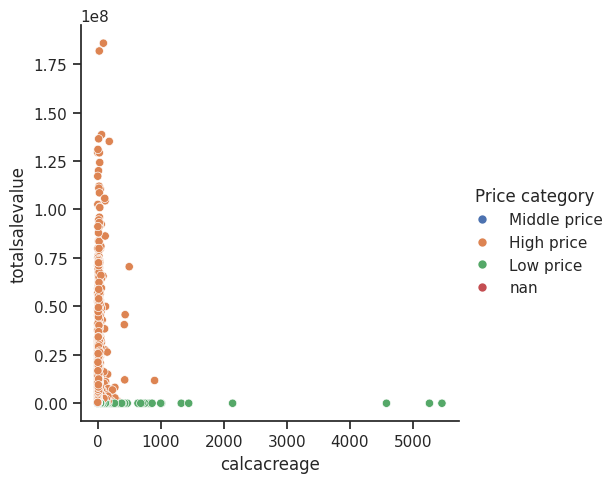

In [144]:
# Create a categorical plot in seaborn using the price categories created above

g = sns.relplot(x="calcacreage", y="totalsalevalue", hue="Price category", data=df, kind="scatter")

#### Scatterplots Notes:

1. Data seems off...even when comparing the totalsalesvalue with other variables (e.g. building square footage), distribution of price categories looks similar. In order to proceed with the analysis, outliers from some of the price columns will need to be removed.

2. Additionally, it would be helpful to see data broken out into groups by property category, which can be done by evaluating the landclass column

# 05. Final Exercise Notes

## Thoughts on Next Steps & Hypotheses

1. Next Steps & Questions

    - There needs to be more work done with handling the outliers and missing data as they are throwing off the correlations and variables.
    - Answering one of the first excercise questions--yes there are outliers, one with a value of over 460 million dollars which seems way off, worth exploring but likely needs to be removed. When removing the outliers, max values were 800,000 - 900,000 dollars.
    - What still needs to be explore further once outliers are dealt with is the relationship between acreage and total property value as well as prices by township, property type, etc.
    - More research to be done on physical location and price once outliers are remove (latitude and longitude correlations were odd above and mostly had neutral or negative correlations with property values).
      

2. Possible Hypothesis

   - Properties with higher acreage will have higher land value.
   - Multi family unit condos will have higher property value than single family unit homes.
   - If the building has higher square footage, it's value increases.
